In [ ]:
# experimental: you can run this cell to see your code full-width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
# the usual imports
import pprint as pp
import json

In [2]:
# starting code that loads data, run this cell, but no need to understand it in depth
# this function just loads the data from files
def load_json_file_named(file_name):
    try: 
        loaded_data = []
        file_location = f"data/{file_name}"
        with open(file_location, 'r') as file: # or f"data/{file_name}" depending on your files
            loaded_data =  json.load(file)
    except OSError as e:
        print(f"Error. Does the file exist in this folder? {file_location}\n\n {e}")
    return loaded_data

In [3]:
boards_info = load_json_file_named('nhs_scotland_boards.json')
covid_days = load_json_file_named('covid_records_scotland.json')
cancer_waiting_times = load_json_file_named('cancer_waiting_times.json')
boards_code_lookup = load_json_file_named('boards_code_lookup.json')

In [4]:
# Importing all the libraries
import pprint as pp
import json
import numpy as np
import matplotlib.pyplot as plt

## 1) Extracting data from json

### i) Budget assigned to each board for a particular year
This function was created to get the budget for a particular year and across different boards in a 
single dictionary

In [5]:
def yearwise_board_budget(year):
    year_board_dict = {}
    for i in range(0,len(boards_info)):
        year_board_dict.update({boards_info[i]['name']:boards_info[i]['budget_millions'][year]})
    return year_board_dict


### For example we have used year 2021. Similarly this function can be used to get the budget for year 2020 and 2022
yearwise_board_budget('2021')

{'NHS Ayrshire and Arran': 775,
 'NHS Borders': 223,
 'NHS Dumfries and Galloway': 321,
 'NHS Fife': 713,
 'NHS Forth Valley': 569,
 'NHS Grampian': 1028,
 'NHS Greater Glasgow and Clyde': 2398,
 'NHS Highland': 692,
 'NHS Lanarkshire': 1286,
 'NHS Lothian': 1570,
 'NHS Orkney': 55,
 'NHS Shetland': 55,
 'NHS Tayside': 820,
 'NHS Western Isles': 81}

### ii) Extracting aggregated values from "board_info" data

This function aggregates the values at board level available in the board_info dataset for different metrics such as 'Budget, patients, staff and area (km2)' of the board

In [6]:
def total_boardwise_values(metrics):
    metrics_name = 'total_' + metrics + '_boardwise' ##creating a dynamic metric name based on the metric input provided 
    metrics_name = {}                                
    if metrics == 'budget_millions':
        for i in range(0,len(boards_info)):
            metrics_name.update({boards_info[i]['name']:sum(list(boards_info[i]['budget_millions'].values()))})
    elif metrics == 'patients' or metrics == 'staff':
        for i in range(0,len(boards_info)):
            metrics_name.update({boards_info[i]['name']:boards_info[i]['people'][metrics]})
    elif metrics == 'area_km_2':
        for i in range(0,len(boards_info)):
            metrics_name.update({boards_info[i]['name']:boards_info[i]['geographic']['area_km_2']})
    
    return metrics_name

### For example we have used the metric 'area_km_2'. Similarly this function can be used to get the aggregated values 
### at board level for 'budget_millions','patients' and 'staff'

total_boardwise_values('area_km_2')    

{'NHS Ayrshire and Arran': 2924,
 'NHS Borders': 4732,
 'NHS Dumfries and Galloway': 6216,
 'NHS Fife': 1235,
 'NHS Forth Valley': 2643,
 'NHS Grampian': 8736,
 'NHS Greater Glasgow and Clyde': 1106,
 'NHS Highland': 32566,
 'NHS Lanarkshire': 4732,
 'NHS Lothian': 1471,
 'NHS Orkney': 989,
 'NHS Shetland': 1467,
 'NHS Tayside': 7527,
 'NHS Western Isles': 3070}

### iii) Extracting aggregated values from "covid_days" data
This function aggregates the values at board level available in the covid_days dataset for different metrics such as 'new_positive, new_deaths, first_infections, and reinfections'

In [7]:
def total_infection_metrics(metrics_name):
    location_metrics_name = 'location_' + metrics_name
    location_metrics_name={}
    
    for i in list(covid_days[0]['locations'].keys()):
        list_name = i + metrics_name
        
        list_name= [
            covid['locations'][i].get(metrics_name, 0)
            for covid in covid_days]
        
        location_metrics_name.update({i:sum(list_name)})
    
    return location_metrics_name

### For example we have used the metric 'reinfections'. Similarly this function can be used to get the aggregated values 
### at board level for 'new_positive','new_deaths' and 'first_infections'

total_infection_metrics('reinfections')

{'NHS Ayrshire and Arran': 6237,
 'NHS Borders': 817,
 'NHS Dumfries and Galloway': 1274,
 'NHS Fife': 4805,
 'NHS Forth Valley': 4698,
 'NHS Grampian': 5144,
 'NHS Greater Glasgow and Clyde': 23653,
 'NHS Highland': 2455,
 'NHS Lanarkshire': 13690,
 'NHS Lothian': 12281,
 'NHS Orkney': 61,
 'NHS Shetland': 74,
 'NHS Tayside': 5346,
 'NHS Western Isles': 133}

## 2) Visualizing the data

### i) Cluster bar chart to understand the Patient and Staff distribution across the boards

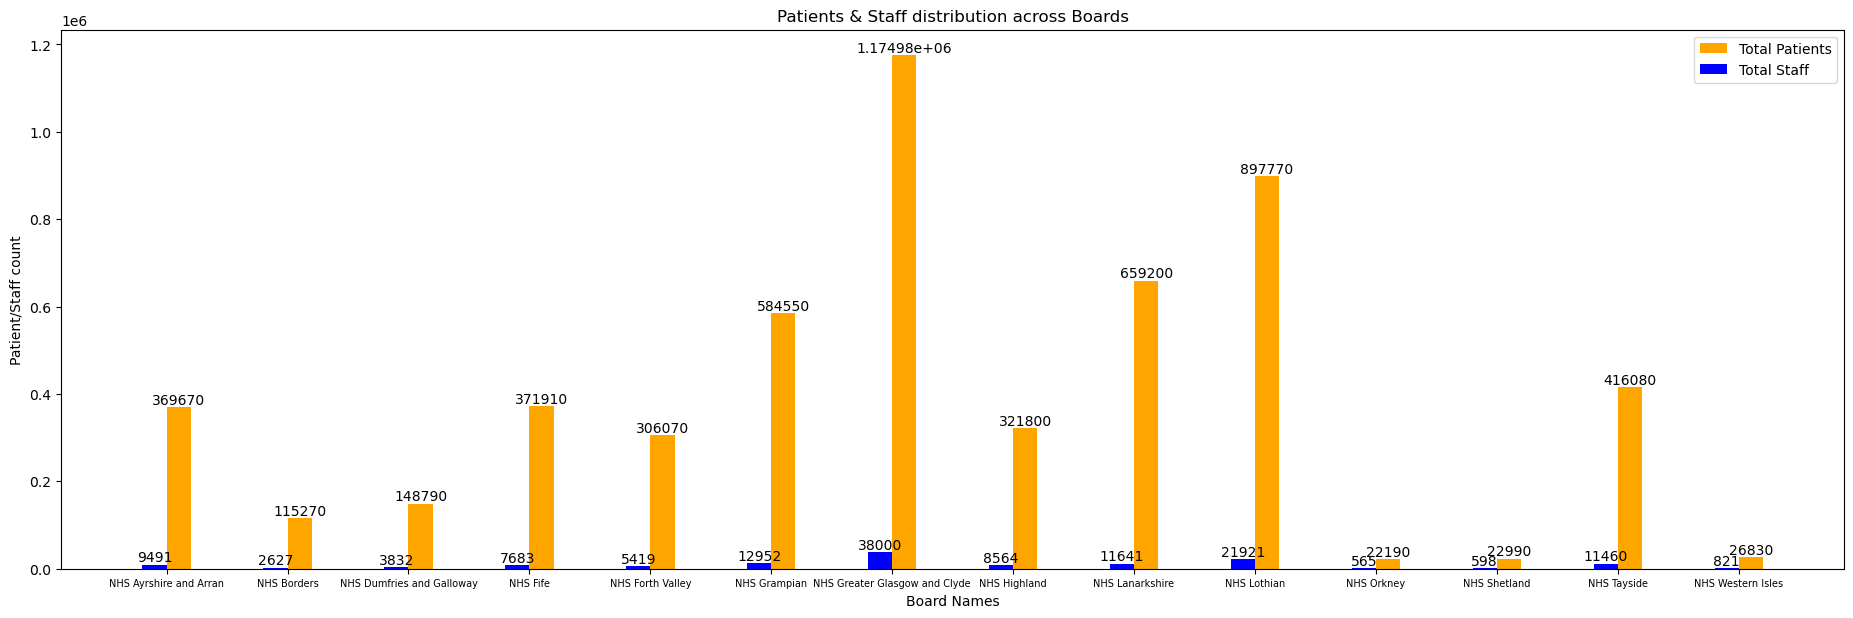

In [8]:
total_xpoints =np.arange(len((total_boardwise_values('patients'))))               ##Set the count of total points on X axis
width=0.2                                                                         ##Set the width of the bars
fig, ax = plt.subplots(figsize=(23,7))                                            ##Set the graph size
total_patient = ax.bar(total_xpoints + width/2,total_boardwise_values('patients').values(),
                       color='orange',width=0.2, label='Total Patients')          ##Plot the Patient count in the first bar
total_staff = ax.bar(total_xpoints - width/2,total_boardwise_values('staff').values(),
                       color='blue',width=0.2,label='Total Staff')                ##Plot the Staff count in the second bar
    
ax.set_xlabel('Board Names')                                                      ##Set the label for X - axis
ax.set_ylabel('Patient/Staff count')                                              ##Set the label for Y - axis
ax.set_title('Patients & Staff distribution across Boards')                       ##Set the title for the graph
ax.set_xticks(total_xpoints)                                                      ##Assign the location for labels                                           
ax.set_xticklabels(total_boardwise_values('staff').keys(),size=7)                 ##Set the labels for each bar on X - axis
ax.legend(['Total Patients','Total Staff'])                                       ##Set the legend
for bars in ax.containers:
    ax.bar_label(bars)                                                            ##Set the data labels

### ii) Scatter plot of Patient vs Staff count

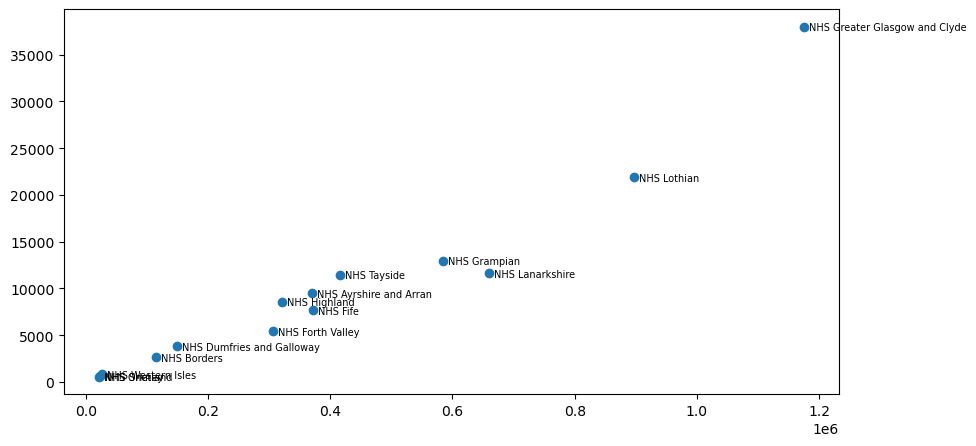

In [9]:
fig, ax = plt.subplots(figsize=(10,5))                                                             

ax.scatter(total_boardwise_values('patients').values(),total_boardwise_values('staff').values(),
           marker='.',linewidths=4)
                                               
for (patients, staff, board_name) in zip(list(total_boardwise_values('patients').values()),        ##Set the data labels
                                         list(total_boardwise_values('staff').values()),
                                         list(total_boardwise_values('staff').keys())):
    plt.text(patients+8000, staff-400,board_name, size=7)                                                             

### iii) Bar chart to understand the area (in km2) of region in which the board is located 

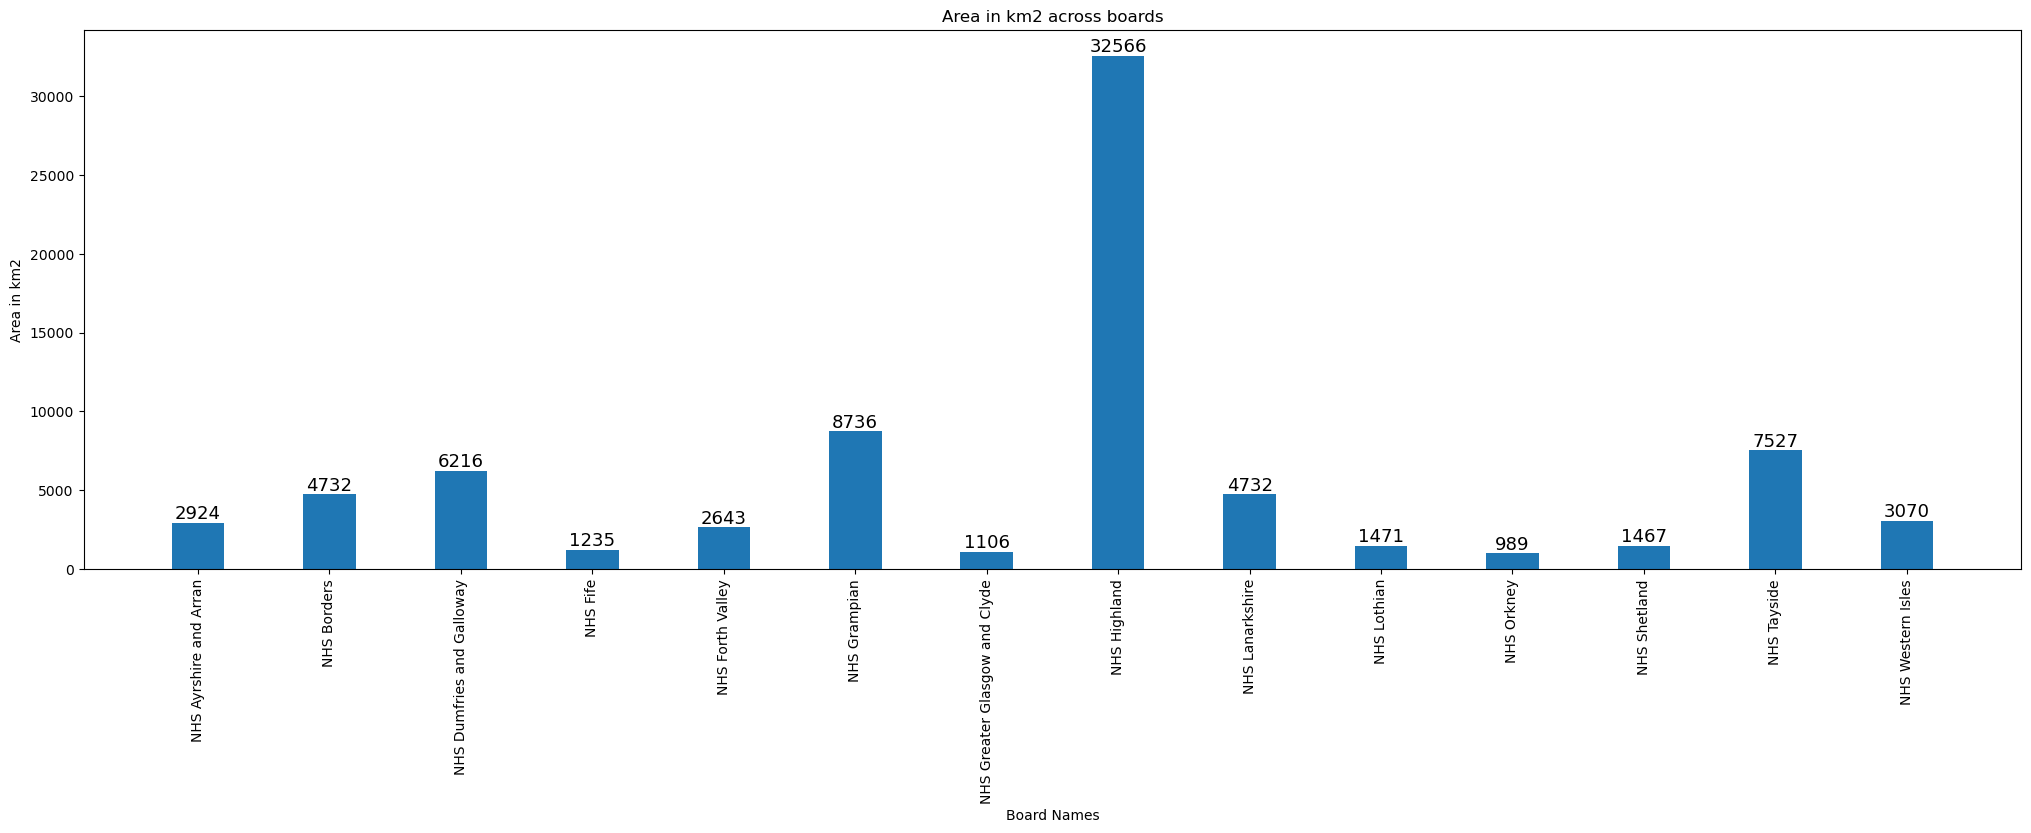

In [12]:
plt.bar(total_boardwise_values('area_km_2').keys(),                ##Plot the graph 
        total_boardwise_values('area_km_2').values(),width=0.4)
plt.rcParams['figure.figsize']=(23,7)                              ##Set the graph size                                     
plt.xticks(rotation=90)                                            ##Set the board names vertically for clear representation
plt.xlabel('Board Names')                                          ##Set the name for X - axis
plt.ylabel('Area in km2')                                          ##Set the name for Y - axis
plt.title('Area in km2 across boards')                             ##Set the title for graph

for (board, area) in zip(list(total_boardwise_values('area_km_2').keys()),
    list(total_boardwise_values('area_km_2').values())):           ##Set the data labels
    plt.text(board, area, area, size=13,ha='center',va='bottom')

### iv) Bar chart to understand the total reinfected patient counts in each board

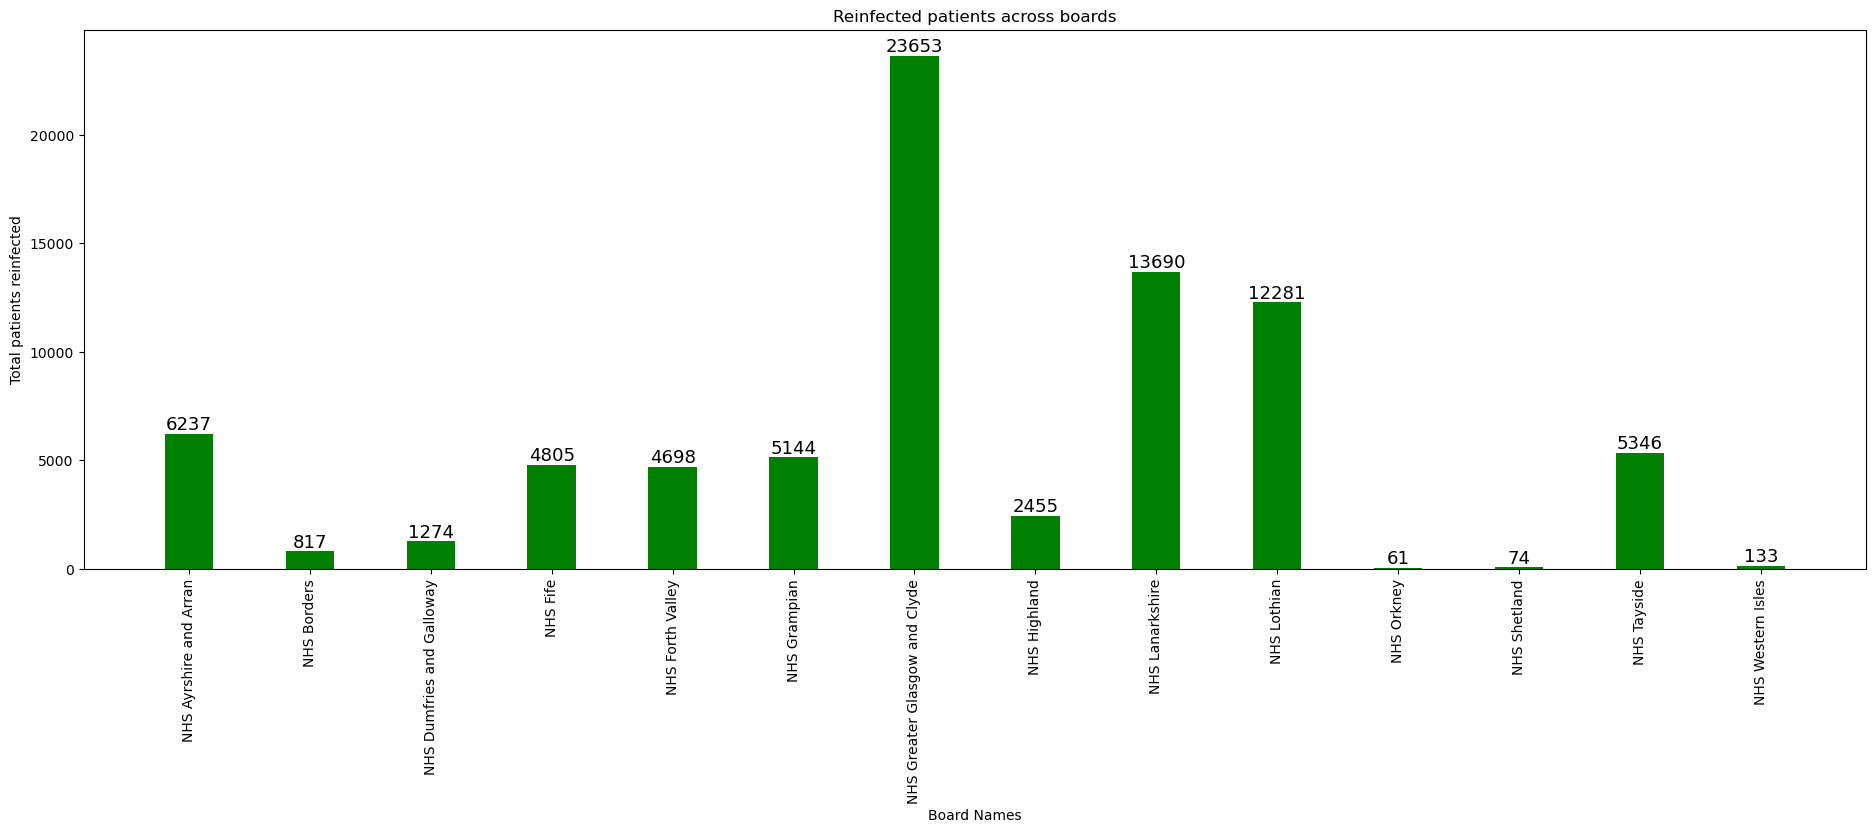

In [13]:
plt.bar(total_infection_metrics('reinfections').keys(),            
        total_infection_metrics('reinfections').values(),width=0.4, color='green')

plt.rcParams['figure.figsize']=(25,7)                              
plt.xticks(rotation=90)                                            
plt.xlabel('Board Names')                                          
plt.ylabel('Total patients reinfected')                            
plt.title('Reinfected patients across boards')                     

for (board, reinfection) in zip(list(total_infection_metrics('reinfections').keys()),
    list(total_infection_metrics('reinfections').values())):       
    plt.text(board, reinfection, reinfection, size=13,ha='center',va='bottom')

### Your minireport can be here

Click this cell to edit it. Run it with Shift+Enter to see how it will look when 'interpreted'.

### Superimposed Area and Reinfection graph (Final graph for evaluation)

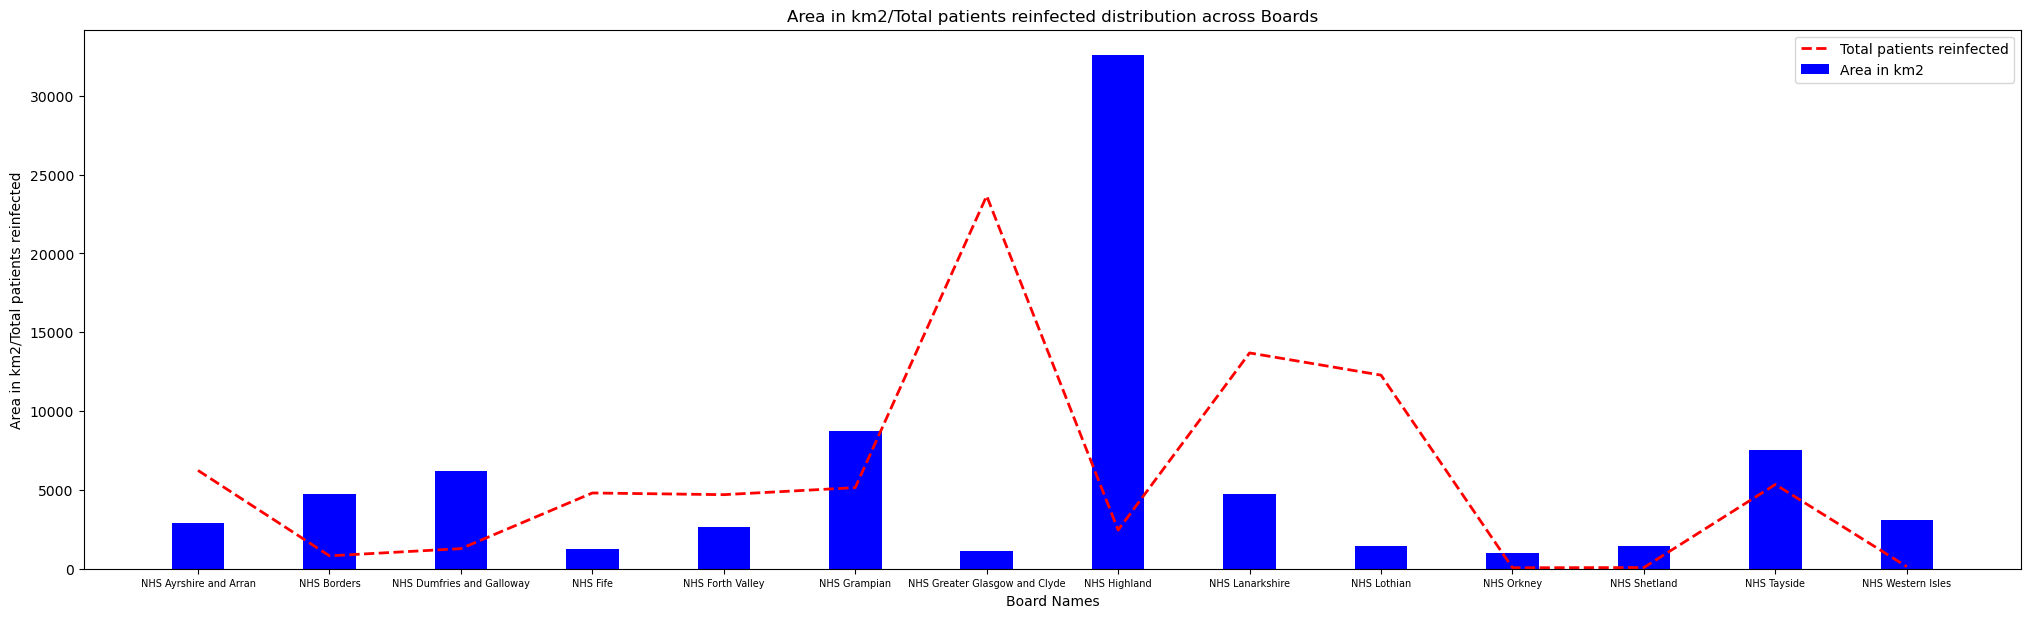

In [15]:
fig, ax = plt.subplots(figsize=(25,7))                                            ##Set the graph size                                           

area_bar = ax.bar(total_boardwise_values('area_km_2').keys(),                     ##Plot the area values as a bar
                  total_boardwise_values('area_km_2').values(),
                  width=0.4,color='blue',label='Area in km2')

reinfection_line = ax.plot(total_infection_metrics('reinfections').keys(),        ##Plot the reinfection count as a line
                           total_infection_metrics('reinfections').values(),
                           linestyle='--',color='red',lw=2,label='Total patients reinfected')

ax.set_xlabel('Board Names')                                                      
ax.set_ylabel('Area in km2/Total patients reinfected')                            
ax.set_title('Area in km2/Total patients reinfected distribution across Boards')  
ax.set_xticks(total_xpoints)                                                                                                 
ax.set_xticklabels(total_boardwise_values('area_km_2').keys(),size=7)             
ax.legend(['Total patients reinfected','Area in km2'])                            

### Note: We have not included data labels in this final graph for clear representation of the area bar and reinfection line

__Business Question__: 

“Why do ‘NHS Greater Glasgow and Clyde’ and ‘NHS Lothian’ boards have a high patient and staff count compared to 
the other boards?”

__Mini Report__:

To understand the distribution of patient and staff count across boards, we plotted clustered bar graphs. It was observed that the difference between patient and staff count was high across all the boards. On further investigation using scatter plots, we noticed that while the majority of the boards had a linear relation between patient and staff count, ‘NHS Greater Glasgow and Clyde’ and ‘NHS Lothian’ boards had a standout position.

In our quest to determine the factors affecting this behavior, we checked the distribution of area (in km2) across boards. Among all the 14 boards, ‘NHS Greater Glasgow and Clyde’ and ‘NHS Lothian’ had smaller areas with greater reinfection counts. Since COVID is a contagious disease, this strengthens our assumption that in smaller areas the possibility of patients contracting COVID again is high thereby, requiring more staff for treatment. Hence, based on the provided datasets we can say that ‘NHS Greater Glasgow and Clyde’ and ‘NHS Lothian’ had a high patient and staff count due to smaller area and high reinfection rate.
